#Cliff_walking_q_learning

In [1]:
!pip install gym numpy matplotlib


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


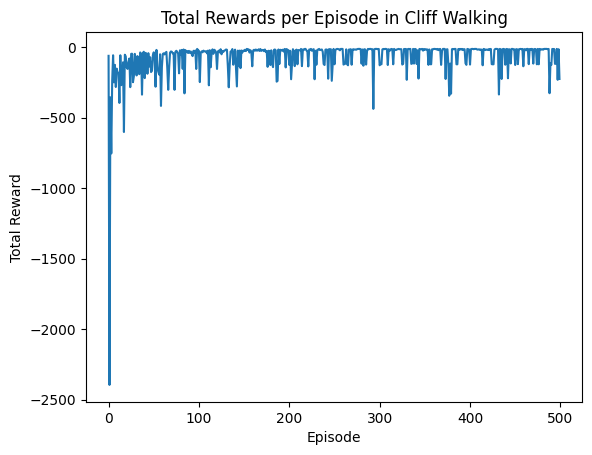

Learned Q-table:
[[ -10.47357982  -10.54462915  -10.51659415  -10.46766446]
 [ -10.20867229  -10.1059759   -10.13523578  -10.13099408]
 [  -9.58757471   -9.54777586   -9.53955073   -9.60473419]
 [  -8.86266847   -8.88682039   -8.92988871   -8.93086618]
 [  -8.19329165   -8.20988029   -8.24917699   -8.22432176]
 [  -7.49242302   -7.49776209   -7.51628413   -7.60578008]
 [  -6.73449703   -6.74151506   -6.80935333   -6.86730805]
 [  -5.97627934   -5.96816196   -6.0031875    -6.13892568]
 [  -5.22813441   -5.21174118   -5.24746895   -5.25314984]
 [  -4.47926937   -4.43035538   -4.46464606   -4.56113907]
 [  -3.68964947   -3.68491941   -3.67338419   -3.69739441]
 [  -2.95227931   -3.02498189   -2.89642053   -3.0596016 ]
 [ -10.92478425  -10.91208213  -10.97171414  -10.90682632]
 [ -10.38461251  -10.33043209  -10.51224865  -10.46329816]
 [  -9.75386346   -9.68395948   -9.79655258   -9.70117585]
 [  -8.96835721   -8.97020704   -8.98584055   -9.13325973]
 [  -8.25003188   -8.23239333   -8.2821

In [2]:
import numpy as np
import gym
import matplotlib.pyplot as plt

# Create the CliffWalking environment
env = gym.make('CliffWalking-v0')

# Q-Learning parameters
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 0.1  # Exploration rate
num_episodes = 500

# Initialize the Q-table with zeros
q_table = np.zeros((env.observation_space.n, env.action_space.n))

# Function for choosing an action using an epsilon-greedy policy
def choose_action(state):
    if np.random.rand() < epsilon:
        return env.action_space.sample()  # Explore
    else:
        return np.argmax(q_table[state])  # Exploit

# List to store the total rewards per episode
total_rewards = []

# Q-Learning algorithm
for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0
    done = False

    while not done:
        action = choose_action(state)
        next_state, reward, done, _ = env.step(action)

        # Update the Q-value using the Q-Learning formula
        best_next_action = np.argmax(q_table[next_state])
        q_table[state, action] += alpha * (reward + gamma * q_table[next_state, best_next_action] - q_table[state, action])

        state = next_state
        total_reward += reward

    total_rewards.append(total_reward)

# Plot the rewards per episode
plt.plot(total_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Rewards per Episode in Cliff Walking')
plt.show()

# Display the learned Q-table
print("Learned Q-table:")
print(q_table)
